In [ ]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Image Classification Data/metadata.csv')

FileNotFoundError: ignored

In [ ]:
df['Keywords'] = df['Keywords'].str.lower()

In [ ]:
df['Keywords'] = df['Keywords'].str.replace('steve swartz', 'steven r. swartz')
df['Keywords'] = df['Keywords'].str.replace('srs', 'steven r. swartz')
df['Keywords'] = df['Keywords'].str.replace('steve r. swartz', 'steven r. swartz')

df['Keywords'] = df['Keywords'].str.replace('fab','frank a. bennack')
df['Keywords'] = df['Keywords'].str.replace('frank bennack','frank a. bennack')


df['Keywords'] = df['Keywords'].str.replace('hearst magazines','magazines')

df['Keywords'] = df['Keywords'].str.replace('portraits','headshots')

#group of executives,al smith dinner, al smith dinner 2021, alfred e. smith memorial foundation, alfred e. smith memorial foundation dinner, charities, archdiocese of new york, dinners, catholic charities
df['Keywords'] = df['Keywords'].str.replace(',executives,',',al smith dinner,')
df['Keywords'] = df['Keywords'].str.replace('al smith dinner 2021','al smith dinner')
df['Keywords'] = df['Keywords'].str.replace(',alfred e. smith memorial foundation,',',al smith dinner,')
df['Keywords'] = df['Keywords'].str.replace('alfred e. smith memorial foundation dinner','al smith dinner')
df['Keywords'] = df['Keywords'].str.replace(',charities,',',al smith dinner,')
df['Keywords'] = df['Keywords'].str.replace('archdiocese of new york','al smith dinner')
df['Keywords'] = df['Keywords'].str.replace(',dinners,',',al smith dinner,')
df['Keywords'] = df['Keywords'].str.replace('catholic charities','al smith dinner')

#group of texas 2014, texas 2016, texas 2017, texas 2018, retreat, texas 2019
df['Keywords'] = df['Keywords'].str.replace('retreat','texas 2018')


#group of gcm, gil maurer, gilbert c. maurer
df['Keywords'] = df['Keywords'].str.replace('gcm','gilbert c. maurer')
df['Keywords'] = df['Keywords'].str.replace('gil maurer','gilbert c. maurer')

#group of real estate, hearst real estate
df['Keywords'] = df['Keywords'].str.replace(',real estate,',',hearst real estate,')

#group of tower week, tower, tower tuesdays 
df['Keywords'] = df['Keywords'].str.replace('tower week','tower')
df['Keywords'] = df['Keywords'].str.replace('tower tuesdays','tower')

#group of hearst ranch, ranch, cattle, jack ranch, cattle gathering, horses
df['Keywords'] = df['Keywords'].str.replace(',ranch,',',hearst ranch,')
df['Keywords'] = df['Keywords'].str.replace(',cattle,',',hearst ranch,')
df['Keywords'] = df['Keywords'].str.replace('jack ranch',',hearst ranch,')
df['Keywords'] = df['Keywords'].str.replace('cattle gathering','hearst ranch')
df['Keywords'] = df['Keywords'].str.replace('horses','hearst ranch')

#group of mary lake bennack, mark lake bennack
df['Keywords'] = df['Keywords'].str.replace('mark lake bennack','mary lake bennack')

#group of events, event
df['Keywords'] = df['Keywords'].str.replace(',event,',',events,')

#group of michael a. clinton, michael clinton, mac
df['Keywords'] = df['Keywords'].str.replace('mac','michael a. clinton')
df['Keywords'] = df['Keywords'].str.replace('michael clinton','michael a. clinton')

#group of hearst ventures, ventures
df['Keywords'] = df['Keywords'].str.replace(',ventures,',',hearst ventures,')

#group of lingochamp, ken bronfin
df['Keywords'] = df['Keywords'].str.replace('lingochamp','ken bronfin')


#group hearst newspapers, newspapers
df['Keywords'] = df['Keywords'].str.replace(',newspapers,',',hearst newspapers,')

#group of culture shifting weekend, culture shift labs
df['Keywords'] = df['Keywords'].str.replace('culture shifting weekend','culture shift labs')

#delete 1276x960 

#group of tony mazzola, the anthony mazzola years, the editor’s eye
df['Keywords'] = df['Keywords'].str.replace('the anthony mazzola years','tony mazzola')
df['Keywords'] = df['Keywords'].str.replace('the editor’s eye','tony mazzola')

#group of annual review, annual review 2021, annual review 2013, annual, 

#group of 125th anniversary, 125
df['Keywords'] = df['Keywords'].str.replace(',125,',',125th anniversary,')

#group of richard malloch, rich malloch
df['Keywords'] = df['Keywords'].str.replace('rich malloch','richard malloch')

#group of cooking, herding
df['Keywords'] = df['Keywords'].str.replace('cooking','herding')

#group of interns, hearst associates, t. howard interns
df['Keywords'] = df['Keywords'].str.replace('t. howard interns','hearst associates')
df['Keywords'] = df['Keywords'].str.replace(',interns,',',hearst associates,')

#group of volunteering, volunteer events
df['Keywords'] = df['Keywords'].str.replace('volunteering','volunteer events')

#group of spotlights

#group of editorial excellences

#group of greg dorn, gregory dorn
df['Keywords'] = df['Keywords'].str.replace('greg dorn',',gregory dorn,')

#group of fitch, fitch group
df['Keywords'] = df['Keywords'].str.replace(',fitch,',',fitch group,')

#transportation
#group of fitch, fitch group
df['Keywords'] = df['Keywords'].str.replace(',transportation,',',hearst transportation,')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:86: FutureWarning: The default value of regex will change from True to False in a future version.


In [ ]:
df['Keywords'] = df['Keywords'].str.split(',')

In [ ]:
l = (df['Keywords'].apply(pd.Series).stack().reset_index(drop = True)).value_counts()

In [ ]:
l.head(50)

people @ work                   7059
events                          6703
al smith dinner                 4712
frank a. bennack                4110
magazines                       4093
44th floor                      3025
steven r. swartz                2095
texas                           2090
texas 2018                      1698
headshots                       1514
2019                            1332
2021                            1266
2016                            1241
2018                            1173
hearst tower                    1076
gilbert c. maurer               1062
friday                          1037
thursday                        1029
2013                            1020
hearst ranch                     976
the long gray line               940
homecoming                       936
tower                            849
corporate                        840
2017                             732
spotlight                        700
awards                           644
a

In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
img_path = '/content/drive/MyDrive/Image Classification Data/images/207900350.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

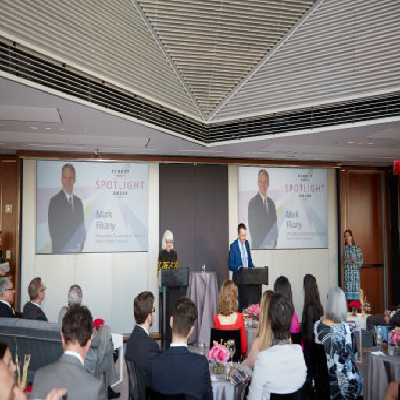

In [ ]:
img_path = '/content/drive/MyDrive/Image Classification Data/images/207895648.jpg'
img = image.load_img(img_path, target_size=(400, 400))
img

In [ ]:
#Removing repeat words from each row
def word_replace(test_list):
  res = []
  [res.append(x) for x in test_list if x not in res]
  return res

In [ ]:
new_list_apply = df.apply(
         lambda row: word_replace(row['Keywords']),
         axis=1)

In [ ]:
df['new'] = new_list_apply

In [ ]:
l = (df['new'].apply(pd.Series).stack().reset_index(drop = True)).value_counts()

In [ ]:
df['new']

0       [people @ work, hearst transportation, transpo...
1       [people @ work, hearst transportation, transpo...
2       [people @ work, hearst transportation, headsho...
3       [people @ work, hearst transportation, headsho...
4       [people @ work, cds, magazines, headshots, emp...
                              ...                        
9294                        [steven r. swartz, headshots]
9295                        [steven r. swartz, headshots]
9296                        [steven r. swartz, headshots]
9297    [steven r. swartz, 125th anniversary, newseum,...
9298                        [steven r. swartz, headshots]
Name: new, Length: 9299, dtype: object

In [ ]:
#Keeping words with frequency greater than 50
final_words = l[l.values > 50]

In [ ]:
final_words

people @ work       7059
events              6693
44th floor          3025
texas               2090
magazines           1613
                    ... 
icefall               53
angela aldam          53
jillian steadman      52
spotlight 2021        52
sales                 51
Length: 141, dtype: int64

In [ ]:
#Keeping words with frequency greater than 50
def keepwords(word_list, wordstokeep):
  res = []
  [res.append(x) for x in word_list if x in wordstokeep]
  return res
  

In [ ]:
keywords = final_words.keys().tolist()

In [ ]:
final_list_apply = df.apply(
         lambda row: keepwords(row['new'], keywords),
         axis=1)

In [ ]:
df['final_keywords'] = final_list_apply

In [ ]:
df['final_keywords']

0            [people @ work, employee image, career site]
1            [people @ work, employee image, career site]
2       [people @ work, headshots, employee image, car...
3       [people @ work, headshots, employee image, car...
4       [people @ work, magazines, headshots, employee...
                              ...                        
9294                        [steven r. swartz, headshots]
9295                        [steven r. swartz, headshots]
9296                        [steven r. swartz, headshots]
9297    [steven r. swartz, 125th anniversary, citizen ...
9298                        [steven r. swartz, headshots]
Name: final_keywords, Length: 9299, dtype: object

In [ ]:
test_df = pd.DataFrame()

In [ ]:
test_df = df[['Record ID', 'final_keywords']]

In [ ]:
test_df 

,Record ID,final_keywords
0,207431327,"[people @ work, employee image, career site]"
1,207431332,"[people @ work, employee image, career site]"
2,207431348,"[people @ work, headshots, employee image, car..."
3,207431356,"[people @ work, headshots, employee image, car..."
4,207432753,"[people @ work, magazines, headshots, employee..."
...,...,...
9294,206293007,"[steven r. swartz, headshots]"
9295,206293008,"[steven r. swartz, headshots]"
9296,206293009,"[steven r. swartz, headshots]"
9297,206293010,"[steven r. swartz, 125th anniversary, citizen ..."


In [ ]:
#One Hot Coding
for x in range(0,9299):
  for word in keywords:
    test_df.loc[x, word] = word in test_df['final_keywords'][x]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has p

In [ ]:
test_df

,Record ID,final_keywords,people @ work,events,44th floor,texas,magazines,frank a. bennack,2019,2021,...,spotlight 2020,patti lupone,alex carlin,citizen hearst,editorial excellence 2017,icefall,angela aldam,jillian steadman,spotlight 2021,sales
0,207431327,"[people @ work, employee image, career site]",True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,207431332,"[people @ work, employee image, career site]",True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,207431348,"[people @ work, headshots, employee image, car...",True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,207431356,"[people @ work, headshots, employee image, car...",True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,207432753,"[people @ work, magazines, headshots, employee...",True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9294,206293007,"[steven r. swartz, headshots]",False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9295,206293008,"[steven r. swartz, headshots]",False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9296,206293009,"[steven r. swartz, headshots]",False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9297,206293010,"[steven r. swartz, 125th anniversary, citizen ...",False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
test_df.iloc[:, 2:] = test_df.iloc[:, 2:].astype(int)

In [ ]:
test_df

,Record ID,final_keywords,people @ work,events,44th floor,texas,magazines,frank a. bennack,2019,2021,...,spotlight 2020,patti lupone,alex carlin,citizen hearst,editorial excellence 2017,icefall,angela aldam,jillian steadman,spotlight 2021,sales
0,207431327,"[people @ work, employee image, career site]",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,207431332,"[people @ work, employee image, career site]",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,207431348,"[people @ work, headshots, employee image, car...",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,207431356,"[people @ work, headshots, employee image, car...",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,207432753,"[people @ work, magazines, headshots, employee...",1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9294,206293007,"[steven r. swartz, headshots]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9295,206293008,"[steven r. swartz, headshots]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9296,206293009,"[steven r. swartz, headshots]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9297,206293010,"[steven r. swartz, 125th anniversary, citizen ...",0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 <a list of 30 Text major ticklabel objects>)

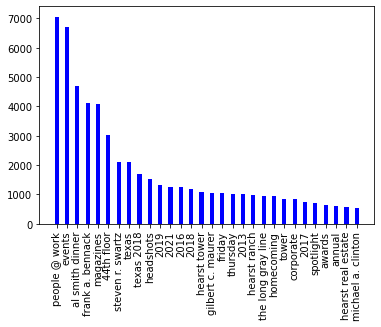

In [ ]:
import matplotlib.pyplot as plt

words = l.head(30).keys().tolist()
count = l.head(30).values.tolist()

plt.bar(words, count, color ='blue',
        width = 0.4)
plt.xticks(rotation = 90)

In [ ]:
import cv2

def sizechart(num):
  x=0
  y=0
  im = cv2.imread('/content/drive/MyDrive/Image Classification Data/images/' + str(num) + '.jpg')
  try:
    x,y,z = im.shape
  except:
    pass
  return x,y


In [ ]:
from tqdm import tqdm
tqdm.pandas()
s = df.progress_apply(
         lambda row: sizechart(row['Record ID']),
         axis=1)

100%|██████████| 9299/9299 [01:10<00:00, 131.72it/s]


In [ ]:
bl[['b1', 'b2']]  = pd.DataFrame(s.tolist())

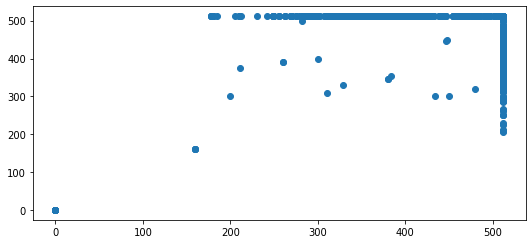

In [ ]:
import matplotlib
matplotlib.pyplot.scatter(bl['b1'], bl['b2'])

In [ ]:
bl.loc[(bl['b1'] <= 300) & (bl['b1'] > 200)]

,0,1,b1,b2
0,242,512,242,512
1,293,512,293,512
12,260,390,260,390
14,260,390,260,390
17,262,512,262,512
...,...,...,...,...
8976,211,375,211,375
9049,288,512,288,512
9262,289,512,289,512
9264,289,512,289,512


In [ ]:
bl.drop(columns = [0,1], axis =1, inplace = True)

In [ ]:
bl.to_excel('heightwidth.xlsx')

Setting Up The Model

In [1]:
import pandas as pd
import keras
from keras import layers
from keras import models
from tensorflow.keras import optimizers
import numpy as np
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions

In [5]:
df = pd.read_excel('/content/drive/MyDrive/onehotcoded.xlsx')

In [6]:
df['final_keywords'] = df['final_keywords'].apply(eval)

In [24]:
first = df.sample(n = 9299, replace = False)
first.drop(columns = ['Unnamed: 0','final_keywords'], axis =1, inplace = True)
first.loc[:,'Record ID'] = first['Record ID'].astype(str) + '.jpg'


In [25]:
train = first[:6000]
validation = first[6000:8000]
test = first[8000:]

In [26]:
from keras_preprocessing.image import ImageDataGenerator

In [27]:

datagen=ImageDataGenerator(
    rescale=1./255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
test_datagen=ImageDataGenerator(rescale=1./255.)

In [28]:
columns = train.columns[1:].tolist()

In [29]:
train_generator=datagen.flow_from_dataframe(
dataframe=train,
directory="/content/drive/MyDrive/images",
x_col='Record ID',
y_col=columns,
batch_size=32,
seed=42,
shuffle=True,
class_mode="raw",
target_size=(256,256))

Found 5747 validated image filenames.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 253 invalid image filename(s) in x_col="Record ID". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [30]:
validation_generator=test_datagen.flow_from_dataframe(
dataframe=validation,
directory="/content/drive/MyDrive/images",
x_col="Record ID",
y_col=columns,
batch_size=32,
seed=42,
shuffle=True,
class_mode="raw",
target_size=(256,256))

Found 1922 validated image filenames.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 78 invalid image filename(s) in x_col="Record ID". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [31]:
test_generator=test_datagen.flow_from_dataframe(
dataframe=test,
directory="/content/drive/MyDrive/images",
x_col="Record ID",
batch_size=1,
seed=42,
shuffle=False,
class_mode=None,
target_size=(256,256))

Found 1242 validated image filenames.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 57 invalid image filename(s) in x_col="Record ID". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [32]:
from keras.applications.vgg16 import VGG16 
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(256, 256, 3))
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [33]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(141, activation='sigmoid'))

In [34]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [35]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

In [36]:
model.compile(loss='binary_crossentropy',
                      optimizer=optimizers.RMSprop(learning_rate=0.0001, decay=1e-6),
                      metrics=[keras.metrics.Precision(top_k=5, name = 'PrecisionTop5'),
                               keras.metrics.Precision(name = 'Precision'), 
                               keras.metrics.Recall(name = 'Recall'),
                               keras.metrics.Recall(top_k = 5, name = 'RecallTop5'),
                               keras.metrics.AUC(name = 'AUC'),
                               keras.metrics.CategoricalAccuracy(name="categorical_accuracy", dtype=None)])

In [37]:
history = model.fit(train_generator,
            steps_per_epoch=STEP_SIZE_TRAIN,
            validation_data=validation_generator,
            validation_steps=STEP_SIZE_VALID,
            epochs = 30
)

Epoch 1/30
179/179 [==============================] - 943s 5s/step - loss: 0.1928 - PrecisionTop5: 0.3717 - Precision: 0.2918 - Recall: 0.3145 - RecallTop5: 0.3096 - AUC: 0.7610 - categorical_accuracy: 0.3466 - val_loss: 0.1027 - val_PrecisionTop5: 0.6068 - val_Precision: 0.8264 - val_Recall: 0.3898 - val_RecallTop5: 0.5045 - val_AUC: 0.9066 - val_categorical_accuracy: 0.5401
Epoch 2/30
179/179 [==============================] - 124s 691ms/step - loss: 0.1143 - PrecisionTop5: 0.5587 - Precision: 0.7041 - Recall: 0.4111 - RecallTop5: 0.4651 - AUC: 0.8786 - categorical_accuracy: 0.4199 - val_loss: 0.0854 - val_PrecisionTop5: 0.6495 - val_Precision: 0.7873 - val_Recall: 0.5184 - val_RecallTop5: 0.5402 - val_AUC: 0.9402 - val_categorical_accuracy: 0.5885
Epoch 3/30
179/179 [==============================] - 122s 680ms/step - loss: 0.0967 - PrecisionTop5: 0.6199 - Precision: 0.7604 - Recall: 0.4725 - RecallTop5: 0.5162 - AUC: 0.9161 - categorical_accuracy: 0.4364 - val_loss: 0.0831 - val_Pr

In [38]:
model.save('vgg16hearst_final.h5')

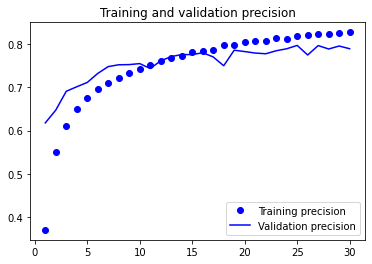

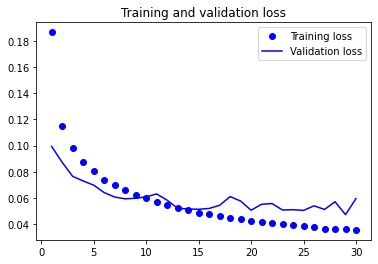

In [ ]:
import matplotlib.pyplot as plt
precision = history.history['PrecisionTop5']
val_precision = history.history['val_PrecisionTop5']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(precision) + 1)
plt.plot(epochs, precision, 'bo', label='Training precision')
plt.plot(epochs, val_precision, 'b', label='Validation precision')
plt.title('Training and validation precision')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [39]:
test_generator.reset()
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

pred_bool = (pred >0.5)
predictions = pred_bool.astype(int)
results=pd.DataFrame(predictions, columns=columns)
results["Record ID"]=test_generator.filenames
ordered_cols=["Record ID"]+columns
results=results[ordered_cols]#To get the same column order

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  after removing the cwd from sys.path.


1242/1242 [==============================] - 156s 125ms/step


In [ ]:
results['Record ID'][0]

'208044347.jpg'

In [ ]:
top_5 = np.argsort(pred[0])[:-6:-1]
classes = np.array(train.columns[1:])
for i in range(5):
    print("{}".format(classes[top_5[i]])+" ({:.3})".format(pred[0][top_5[i]]))

people @ work (0.742)
events (0.0854)
2019 (0.021)
44th floor (0.00149)
magazines (0.0147)


In [41]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

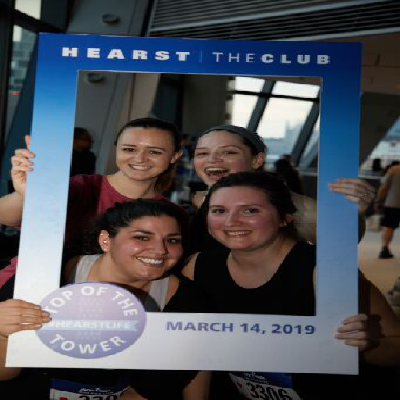

In [50]:
img_path = '/content/drive/MyDrive/images/' + results.loc[0]['Record ID']
img = image.load_img(img_path, target_size=(400, 400))
img

In [ ]:
top_5 = np.argsort(pred[1])[:-6:-1]
classes = np.array(train.columns[1:])

for i in range(5):
    print("{}".format(classes[top_5[i]])+" ({:.3})".format(pred[1][top_5[i]]))

prediction for above image:
people @ work (1.0)
events (1.0)
texas (1.0)
2019 (1.0)
texas 2019 (1.0)


In [40]:
df1 = pd.read_excel('/content/drive/MyDrive/onehotcoded.xlsx')

In [55]:
df1.loc[:,'Record ID'] = df1['Record ID'].astype(str) + '.jpg'

Ground Truth - ['scenery', 'hearst real estate', '2021', 'outdoors', 'san simeon', 'photography', 'hearst castle', '135', 'hearst ranch']
Predictions -
outdoors (0.979)
san simeon (0.979)
photography (0.978)
hearst real estate (0.971)
hearst ranch (0.957)


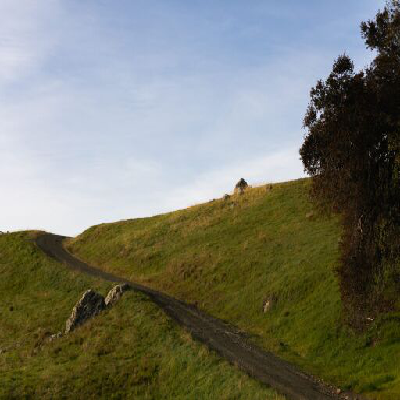

In [133]:
x = 884
print("Ground Truth - " + df1[df1['Record ID'] == results['Record ID'][x]].final_keywords.to_string(index=False))
top_5 = np.argsort(pred[x])[:-6:-1]
classes = np.array(train.columns[1:])
print('Predictions -')
for i in range(5):
    print("{}".format(classes[top_5[i]])+" ({:.3})".format(pred[x][top_5[i]]))

img_path = '/content/drive/MyDrive/images/' + results.loc[x]['Record ID']
img = image.load_img(img_path, target_size=(400, 400))
img

In [134]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               16777728  
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 141)               72333     
                                                                 
Total params: 31,564,749
Trainable params: 23,929,485
Non-trainable params: 7,635,264
_________________________________________________________________
